<a href="https://colab.research.google.com/github/minjoo1412/2020_AI/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_2%EC%B0%A8_%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C_%EC%B6%9C%EC%A0%9C%EB%B3%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# Data loading

from sklearn.datasets import load_wine

dataset = load_wine()
data = dataset.data
labels = dataset.target

print(data)
print(labels)
print(data.shape)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)


In [80]:
# Split data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3) 
print(len(x_train), len(x_test), type(x_train))

print(x_test)
print(y_test)

124 54 <class 'numpy.ndarray'>
[[1.410e+01 2.020e+00 2.400e+00 1.880e+01 1.030e+02 2.750e+00 2.920e+00
  3.200e-01 2.380e+00 6.200e+00 1.070e+00 2.750e+00 1.060e+03]
 [1.184e+01 2.890e+00 2.230e+00 1.800e+01 1.120e+02 1.720e+00 1.320e+00
  4.300e-01 9.500e-01 2.650e+00 9.600e-01 2.520e+00 5.000e+02]
 [1.233e+01 1.100e+00 2.280e+00 1.600e+01 1.010e+02 2.050e+00 1.090e+00
  6.300e-01 4.100e-01 3.270e+00 1.250e+00 1.670e+00 6.800e+02]
 [1.207e+01 2.160e+00 2.170e+00 2.100e+01 8.500e+01 2.600e+00 2.650e+00
  3.700e-01 1.350e+00 2.760e+00 8.600e-01 3.280e+00 3.780e+02]
 [1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
  5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
 [1.217e+01 1.450e+00 2.530e+00 1.900e+01 1.040e+02 1.890e+00 1.750e+00
  4.500e-01 1.030e+00 2.950e+00 1.450e+00 2.230e+00 3.550e+02]
 [1.375e+01 1.730e+00 2.410e+00 1.600e+01 8.900e+01 2.600e+00 2.760e+00
  2.900e-01 1.810e+00 5.600e+00 1.150e+00 2.900e+00 1.320e+03]
 [1.305e+01 2.050e+00 3.

In [81]:
# Convert to tensor

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()
print(type(x_train))

<class 'torch.Tensor'>


In [82]:
# Generating dataset

train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)



"""
문제 1 : train_loader 생성 ( 5점 )

조건 1 : train_set 변수 활용
조건 2 : 배치 크기는 16
조건 3 : shuffle 사용
"""
train_loader = DataLoader(dataset=test_set, batch_size=16, shuffle=True, num_workers=2)


In [89]:
# Construct model
import torch.nn.functional as F

class Model(nn.Module):
  def __init__(self):
    super().__init__()
    
    
    self.fc1 = nn.Linear(13, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 32)
    self.fc5 = nn.Linear(32, 16)
    self.fc6 = nn.Linear(16, 3)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=0)
    



  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc6(x))
    x = self.softmax(x)
    
    return x

model = Model()
print(model)


Model(
  (fc1): Linear(in_features=13, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=0)
)


In [90]:
# Configure optimizer
import torch.optim as optim

"""
문제 4 : Optimizer 생성 (5점)

조건 1 : SGD 생성
조건 2 : 학습률 0.001
조건 3 : Momentum 0.9
"""
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)### 코드 작성 위치

"""
문제 5 : 손실 함수 생성 (5점 )

조건 1 : Cross Entropy Loss 생성
"""
criterion = nn.CrossEntropyLoss()### 코드 작성 위치

In [92]:
# Training

epochs = 200
losses = list()
accuracies = list()
for epoch in range(epochs):
  epoch_loss = 0  
  epoch_accuracy = 0


  for x, y in train_loader:
    output = model(x_train)

    _, predicted = torch.max(output, dim=1)
    accuracy = (predicted == y).sum().item()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy
  

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(x_train)
  print("epoch :{}, \tloss :{}, \taccuracy :{}".format(str(epoch+1).zfill(3),round(epoch_loss,4), round(epoch_accuracy,4)))
  
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

  

RuntimeError: ignored

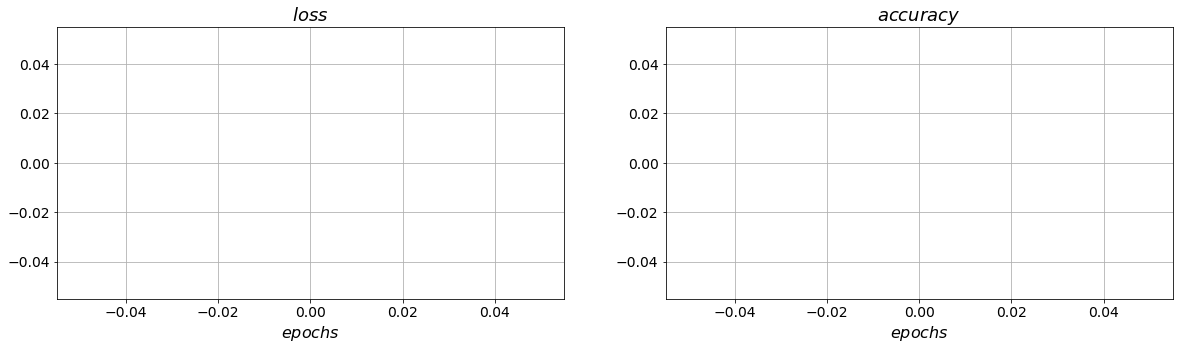

In [53]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [54]:
# Test

output = model(x_test)
_, predicted = torch.max(output, dim=1)
accuracy = round((predicted == y_test).sum().item() / len(y_test),4)


print("test_set accuracy :", round(accuracy,4))

RuntimeError: ignored